<H1> SELF-CASE STUDY-2 on CHATBOT USING CORNELL MOVIE DIALOGS CORPUS </H1>

<H1> 1. BUSINESS/REAL-WORLD PROBLEM

<H2>1.1. PROBLEM STATEMENT</H2>





<p>
Chatbots or other conversational AIs are the new trends in the deep learning world. There are many rule-based chatbots already available that need no neural networks but do not provide a personalized experience. The chatbot being built as part of this case study is trained on movie dialogs corpus and the language is 'ENGLISH'. This is a sequence to sequence modeling problem where the user would input a question while the bot has to provide the answers. The corpus contains the collection of conversations extracted from raw movie scripts, the chatbot would be more favorable to answer the fictional questions or general questions.</p>

<h2> 1.2. SOURCE/USEFUL LINKS </h2>






<b> SOURCE </b>-https://www.cs.cornell.edu/~cristian/Cornell_Movie-Dialogs_Corpus.html

<h2> 1.3. BUSINESS/REAL-WORLD OBJECTIVES AND CONSTRAINTS </h2>


1. Minimize BLEU score for each sequence input

2. SEQUENCE to SEQUENCE Modelling problem
3. No low-latency constraints.


<h1>2.  MACHINE LEARNING PROBLEM </H1>

<h2>2.1. DATA OVERVIEW

This corpus contains a large metadata-rich collection of fictional conversations extracted from raw movie scripts:



- 220,579 conversational exchanges between 10,292 pairs of movie characters

- involves 9,035 characters from 617 movies

- in total 304,713 utterances

- movie metadata included:

    - genres

    - release year

    - IMDB rating

    - number of IMDB votes

    - IMDB rating

- character metadata included:

    - gender (for 3,774 characters)

    - position on movie credits (3,321 characters)
  
  Post decompressing the zip file, we get:

  1.)README.txt-contains the description of the dataset, the format of the corpora files, the details on the collection procedure and the author’s contact.

  2.)chameleons.pdf- original paper for which the corpus has been released.

  3.)movie_conversations.txt- for each conversations, it includes the character ids of the people involved in conversation, movie ids and sentence ids of the line they are uttering.

  4.)movie_lines.txt-contains the actual dialoge of the sentence id and the person who produced it.

  5.)movie_titles_metadata.txt- contains info about the movies like movie id, movie name, year of release, imdb rating , number of votes for the movie on IMDB.

  6.)movie_characters_metadata.txt- contains info about movie id, movie name, character appearing in the movie along with its ID.

  7.)raw_scripts_urls.txt- contains the source URL from where the dialogs of each movie can be retrieved.

<h2>2.2. MAPPING REAL-WORLD PROBLEM TO MACHINE LEARNING PROBLEM</H2>

It is a sequence to sequence problem where the one sequence is a dialoge from a movie is fed to the encoder while the corresponding answer or the very next response to that dialoge forms another sequence is expected as the output of decoder

<H3>2.2.1. TYPE OF MACHINE LEARNING PROBLEM </H3>

It's a kind of classification task only where we have to predict the sequence at the decoder end. output is like P(y1y2y3|x1x2x3) where we have to predict sequence y1y2y3 given sequence x1x2x3 to the encoder.

<H3>2.2.2. PERFORMANCE METRICS</H3>

1. Since it is a kind of classification task where we have to predict sequence output at the decoder end, given the sequence to the encoder, modified sparse categorical crossentropy which will not consider loss for the padded zeros.

2. we can also have BLEU score as another performance metric.

<H3> 2.2.3. MACHINE LEARNING OBJECTIVES AND CONSTRAINTS</H3>

OBJECTIVE: predict the probability of occurence of a sequence at the decoder end, given a sequence is fed to the encoder. P(y1y2y3|x1x2x3).

Constraints:

1.Probability output is required.


<H2>2.3. USEFUL BLOGS, PAPERS, VIDEOS</H2>

<h3> BLOGS and Discussions</h3>

1.https://www.kaggle.com/yening2000/chatbot-nlp-1#Evaluate-and-predict

2.https://www.aozata.com/machine-learning-tutorial-chatbot/

3.https://github.com/Currie32/Chatbot-from-Movie-Dialogue

4.https://jalammar.github.io/illustrated-transformer/




<H2>2.4. BENEFICIARIES OF THE SOLUTION</H2>

THE BENEFICIARIES OF THE SOLUTION:

1.) FILMMAKERS- Since the training has been done on the movie corpus, so could be beneficial for the filmmakers while dialogue writing and delivery.

2.)The chatbot is very generic in nature, so can be used by any hobbyists.

In [1]:
#importing libraries
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# import seaborn as sns
import pandas as pd
import re
import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import seaborn as sns


<h1>3. EXPLORATORY DATA ANALYSIS</h1>

<h2>3.1. Sequence extraction

Download the data using curlwget

In [4]:
!wget --header="Host: doc-10-5k-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/93.0.4577.82 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9,mt;q=0.8,hi;q=0.7" --header="Cookie: AUTH_2u1gmt4j08s836ujksdlj51vps0jhs16=12878554966299595518|1632493875000|6fbdh9rqr66usoae4rqj41gmqil31421" --header="Connection: keep-alive" "https://doc-10-5k-docs.googleusercontent.com/docs/securesc/6kbudo4ee5hqmlq3ia8ppia9sbcvjuvj/32gnu5rb514tu6479kl479auusj73ljp/1632493875000/12878554966299595518/12878554966299595518/1Xql-_6UB8obmLItReI8_GGAdUU1XJkCr?e=download&authuser=0" -c -O 'cornell_movie_dialogs_corpus.zip'

--2021-09-24 14:32:39--  https://doc-10-5k-docs.googleusercontent.com/docs/securesc/6kbudo4ee5hqmlq3ia8ppia9sbcvjuvj/32gnu5rb514tu6479kl479auusj73ljp/1632493875000/12878554966299595518/12878554966299595518/1Xql-_6UB8obmLItReI8_GGAdUU1XJkCr?e=download&authuser=0
Resolving doc-10-5k-docs.googleusercontent.com (doc-10-5k-docs.googleusercontent.com)... 142.250.128.132, 2607:f8b0:4001:c32::84
Connecting to doc-10-5k-docs.googleusercontent.com (doc-10-5k-docs.googleusercontent.com)|142.250.128.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/x-zip-compressed]
Saving to: ‘cornell_movie_dialogs_corpus.zip’

cornell_movie_dialo     [ <=>                ]   9.46M  --.-KB/s    in 0.08s   

2021-09-24 14:32:39 (124 MB/s) - ‘cornell_movie_dialogs_corpus.zip’ saved [9916637]



In [5]:
#unzipping the file
!unzip cornell_movie_dialogs_corpus.zip

Archive:  cornell_movie_dialogs_corpus.zip
   creating: cornell movie-dialogs corpus/
  inflating: cornell movie-dialogs corpus/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/cornell movie-dialogs corpus/
  inflating: __MACOSX/cornell movie-dialogs corpus/._.DS_Store  
  inflating: cornell movie-dialogs corpus/chameleons.pdf  
  inflating: __MACOSX/cornell movie-dialogs corpus/._chameleons.pdf  
  inflating: cornell movie-dialogs corpus/movie_characters_metadata.txt  
  inflating: cornell movie-dialogs corpus/movie_conversations.txt  
  inflating: cornell movie-dialogs corpus/movie_lines.txt  
  inflating: cornell movie-dialogs corpus/movie_titles_metadata.txt  
  inflating: cornell movie-dialogs corpus/raw_script_urls.txt  
  inflating: cornell movie-dialogs corpus/README.txt  
  inflating: __MACOSX/cornell movie-dialogs corpus/._README.txt  


In [7]:
def line_id_collections(path):

    '''

    EXTRACTS LINE-IDs INFORMATION IN CHRONOLOGICAL ORDER FOR FORMTION OF SEQUENCES FOR THE ENCODERS AND DECODRS

    ARGS
    path: path of the file containing the information of line ids of the dialogs

    RETURN
    conversation_IDS: return the line ids of the dialogues in a chronological order so as to form a sequence

    '''
    #reading the movie conversations file
    with open(path,'r',encoding='ISO-8859-1')as f:
          lines=f.readlines()
    #conversation_ids would store the line ids of the dialogs
    conversation_IDS=[]
    #since each line in movie_conversations.txt is separated by delimiter ' +++$+++ ', we split the line with it and the last part of the list is of only interest to us
    for line in lines:
        con=[]
        t=line.split(' +++$+++ ')[3].rstrip()
        #removal of unwanted brackets and special characters
        t=re.sub('\[','',t)
        for i in re.sub('\]','',t).split(', '):
            con.append(re.sub('\'','',i))
        conversation_IDS.append(con)
    return conversation_IDS



In [8]:
dir_path=dir_path='cornell movie-dialogs corpus'
path=dir_path+ '/'+ 'movie_conversations.txt'
conversation_IDS=line_id_collections(path)
    

In [9]:
def movie_line_collections(path):
    '''

    EXTRACTS movie dialogues from the corpus mapped with the line ids

    ARGS
    path: path of the file containing the information of line ids of the dialogs and the movie lines

    RETURN
    line _conversations return a dictionary with key as line id with the dialogue as the value.

    '''
    #reading the movie line text file
    with open(path,'r',encoding='ISO-8859-1') as f:
          lines_text=f.readlines()
    
    line_conversations={}
    #since each line in movie_lines.txt is separated by delimiter ' +++$+++ ', we split the line with it, the first part contains the line ids and the last part contains the dialogs
    for i in lines_text:
           line_conversations[i.split(' +++$+++ ')[0]]=i.split(' +++$+++ ')[4]
    
    return line_conversations


In [10]:
dir_path=dir_path='cornell movie-dialogs corpus'
path=dir_path+ '/'+ 'movie_lines.txt'
line_conversations=movie_line_collections(path)
    

In [11]:
#splitting questions and answers 
#questions would be fed to encoder and answers to decoders( TEACHER FORCING)
questions=[]
answers=[]
pairs=[]

for i in conversation_IDS:
   for j in range(len(i)-1):    
    
       questions.append(line_conversations[i[j]])
       answers.append(line_conversations[i[j+1]])
     

In [12]:
questions[0]

'Can we make this quick?  Roxanne Korrine and Andrew Barrett are having an incredibly horrendous public break- up on the quad.  Again.\n'

In [13]:
answers[0]

"Well, I thought we'd start with pronunciation, if that's okay with you.\n"

<H2> OBSERVATIONS</h2>


1. As we can see from the above two lines that there are certain unwanted characters like \n or unwanted trailing spaces or punctuation marks like '?,.' which need to be removed.

2. Certain words are contracted as we can see in answer[0] like 'we'd' which should be modified as 'we would'.

In [48]:
#converting question and answers in the form of a dataframe
questions=pd.DataFrame(questions,columns=['questions'])
answers=pd.DataFrame(answers,columns=['answers'])
df_data=pd.concat([questions,answers],axis=1)

In [49]:
df_data.head()

,questions,answers
0,Can we make this quick? Roxanne Korrine and A...,"Well, I thought we'd start with pronunciation,..."
1,"Well, I thought we'd start with pronunciation,...",Not the hacking and gagging and spitting part....
2,Not the hacking and gagging and spitting part....,Okay... then how 'bout we try out some French ...
3,You're asking me out. That's so cute. What's ...,Forget it.\n
4,"No, no, it's my fault -- we didn't have a prop...",Cameron.\n


In [50]:
df_data.shape

(221616, 2)

In [51]:

def word_counts(phrase):
     return len(phrase.split())

In [52]:
df_data['questions_word_counts']=df_data['questions'].map(word_counts)
df_data['answers_word_counts']=df_data['answers'].map(word_counts)

In [53]:
print(df_data['questions_word_counts'].max())
print(df_data['answers_word_counts'].max())

313
556


[]

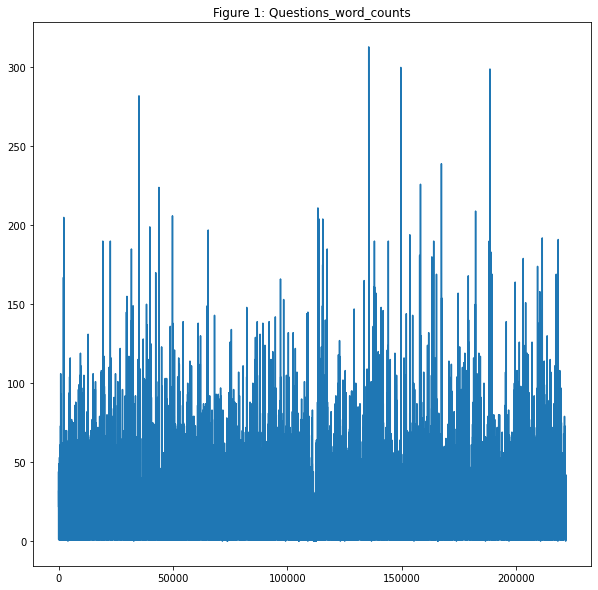

In [54]:
plt.figure(figsize=(10,10))
plt.plot(df_data['questions_word_counts'])
plt.title('Figure 1: Questions_word_counts')
plt.plot()

[]

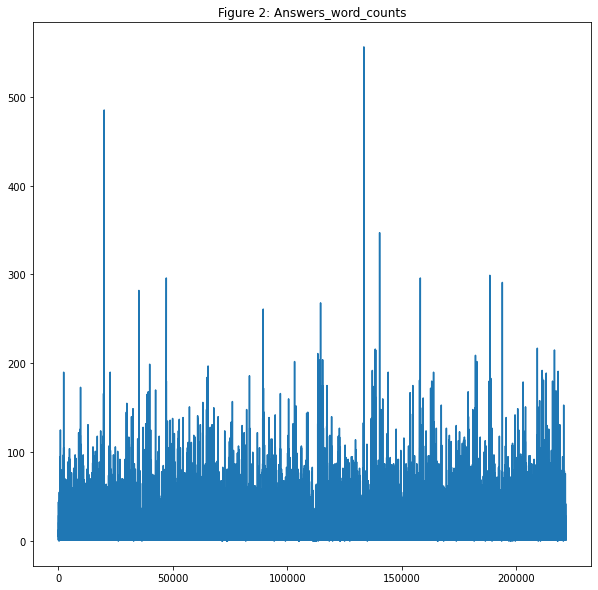

In [55]:
plt.figure(figsize=(10,10))
plt.plot(df_data['answers_word_counts'])
plt.title('Figure 2: Answers_word_counts')
plt.plot()

<h2>OBSERVATIONS</H2>

1. From figure 1, we can see that the nunber of words in questions is roughly in range 100-150 words, while the maximum number of words in a question is 313

2. From figure 2, we can see that the number of words in answers is roughly in the range (100-150), while the maximum number of words in an answer is 556.

In [56]:
#Calculation of  0-100 percentiles of number of words per sequence in the quwstions
for i in range(0,110,10):
     print(f'{i}th percentile of questions_word_counts',np.percentile(df_data['questions_word_counts'].values,i))

0th percentile of questions_word_counts 0.0
10th percentile of questions_word_counts 2.0
20th percentile of questions_word_counts 3.0
30th percentile of questions_word_counts 4.0
40th percentile of questions_word_counts 5.0
50th percentile of questions_word_counts 7.0
60th percentile of questions_word_counts 9.0
70th percentile of questions_word_counts 11.0
80th percentile of questions_word_counts 15.0
90th percentile of questions_word_counts 22.0
100th percentile of questions_word_counts 313.0


In [57]:
#Calculation of  99-100 percentiles of number of words per sequence in the quwstions
for i in range(990,1001,1):
     print(f'{round(i*0.1,1)}th percentile of questions_word_counts',np.percentile(df_data['questions_word_counts'].values,round(i*0.1,1)))

99.0th percentile of questions_word_counts 55.0
99.1th percentile of questions_word_counts 57.0
99.2th percentile of questions_word_counts 59.0
99.3th percentile of questions_word_counts 61.0
99.4th percentile of questions_word_counts 64.0
99.5th percentile of questions_word_counts 68.0
99.6th percentile of questions_word_counts 72.0
99.7th percentile of questions_word_counts 79.0
99.8th percentile of questions_word_counts 89.0
99.9th percentile of questions_word_counts 107.0
100.0th percentile of questions_word_counts 313.0


<h2>OBSERVATION</H2>
From the above code, it is clear that that 99.9% of the sequences in the questions have words less than 107 in them. Max words in  a sequence is 313, which can be treated as an outlier.

In [58]:
#Calculation of  0-100 percentiles of number of words per sequence in the answers
for i in range(0,110,10):
     print(f'{i}th percentile of answers_word_counts',np.percentile(df_data['answers_word_counts'].values,i))

0th percentile of answers_word_counts 0.0
10th percentile of answers_word_counts 2.0
20th percentile of answers_word_counts 3.0
30th percentile of answers_word_counts 4.0
40th percentile of answers_word_counts 5.0
50th percentile of answers_word_counts 7.0
60th percentile of answers_word_counts 9.0
70th percentile of answers_word_counts 11.0
80th percentile of answers_word_counts 16.0
90th percentile of answers_word_counts 23.0
100th percentile of answers_word_counts 556.0


In [59]:
#Calculation of  99-100 percentiles of number of words per sequence in the answers
for i in range(990,1001,1):
     print(f'{round(i*0.1,1)}th percentile of answers_word_counts',np.percentile(df_data['answers_word_counts'].values,round(i*0.1,1)))

99.0th percentile of answers_word_counts 58.0
99.1th percentile of answers_word_counts 60.0
99.2th percentile of answers_word_counts 62.0
99.3th percentile of answers_word_counts 65.0
99.4th percentile of answers_word_counts 68.0
99.5th percentile of answers_word_counts 72.92499999998836
99.6th percentile of answers_word_counts 78.0
99.7th percentile of answers_word_counts 85.0
99.8th percentile of answers_word_counts 94.0
99.9th percentile of answers_word_counts 113.38500000003842
100.0th percentile of answers_word_counts 556.0


<h2>OBSERVATION</H2>
From the above code, it is clear that that 99.9% of the sequences in the answers have words less than 113 in them. Max words in  a sequence is 556, which can be treated as an outlier. 

<h2> 3.2. Data Preprocessing</h2>


The sequences both in questions and answers list contain special characters, punctuation marks, contracted forms like i'll, isn', we need to get rid of such elements in order to have a clean text for encoders.

In [60]:
def decontractions(phrase):

    '''
    decontracted takes text and convert contractions into natural form.
    ref: https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python/47091490#47091490
    Args
    phrase: Phrase of the text with decontractions
    
    Returns
    Phrase of the text without any contracted words in the phrase, post replacing those contracted words with actual words

    '''


    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"won\’t", "will not", phrase)
    phrase = re.sub(r"can\’t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)

    phrase = re.sub(r"n\’t", " not", phrase)
    phrase = re.sub(r"\’re", " are", phrase)
    phrase = re.sub(r"\’s", " is", phrase)
    phrase = re.sub(r"\’d", " would", phrase)
    phrase = re.sub(r"\’ll", " will", phrase)
    phrase = re.sub(r"\’t", " not", phrase)
    phrase = re.sub(r"\’ve", " have", phrase)
    phrase = re.sub(r"\’m", " am", phrase)

    return phrase

In [61]:
def preprocess(phrase):

    '''
    Removal of special characters and conversion of the phrase to lower case post decontractions
    Args
    phrase: Original phrase of the sequence

    Returns:
    Returns the phrase in lower case with removed special characters and decontraction of contracted words

    '''
    #converts the phrase to lower
    phrase = phrase.lower()
    phrase = decontractions(phrase)
    #removes any thing that is not in the range A-Z or a-z  or 0-9 (basically not alphanumeric)
    phrase = re.sub('[^A-Za-z0-9 ]+', '', phrase)
    #removing the unwanted space
    phrase=re.sub('  ',' ',phrase)
    return phrase

In [62]:
#let's clean the phrases of the movie corpus stroed in the dataframe df_data
df_data['questions']=df_data['questions'].apply(preprocess)
df_data['answers']=df_data['answers'].apply(([preprocess]))

In [63]:
df_data['questions'].iloc[0]

'can we make this quick roxanne korrine and andrew barrett are having an incredibly horrendous public break up on the quad again'

In [64]:
df_data['answers'].iloc[0]

'well i thought we would start with pronunciation if that is okay with you'

In [ ]:
enc_words=[]
dec_words=[]
for i in df_data['questions'].values:
    enc_words.extend(i.split())
enc_words=list(set(enc_words))

for i in df_data['answers'].values:
    dec_words.extend(i.split())
dec_words=list(set(dec_words))

In [ ]:
len(dec_words)

53560

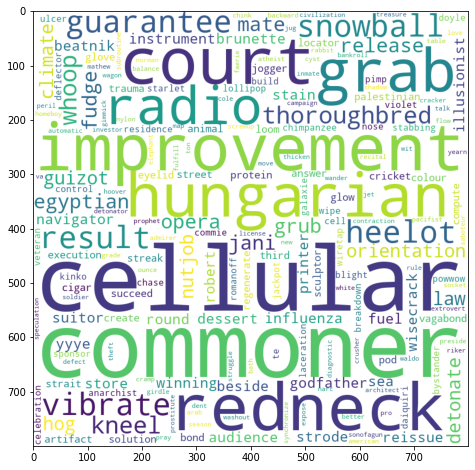

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords=set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(" ".join(enc_words))
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)

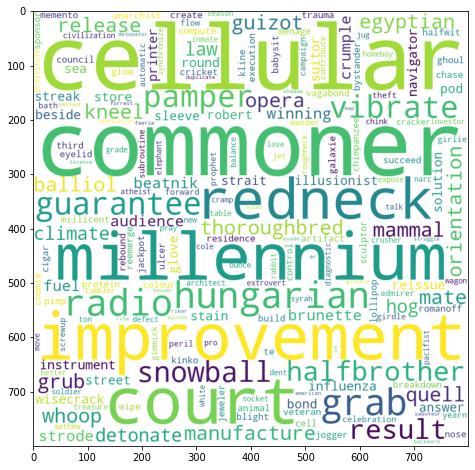

In [ ]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(" ".join(dec_words))
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)

<h2> OBSERVATIONS </H2>

1. 'cellular', 'commoner', 'redneck' are some of the most occuring words in both questions and answers.

2. Certain words like 'kneel', 'heelot' occur more in questions, while words like 'millennium', 'half-brother' occur more in answers.

In [70]:
#we will removing all those rows which have less than min_words and greater than max_words from both questions and answers
#min_words=2
#max_words=78(99.6th percentile of the answers)
rows_to_remove=[]
for row, i in enumerate(df_data['questions']):
    if len(i.split())<2 or len(i.split())>78:
       rows_to_remove.append(row)

for row, i in enumerate(df_data['answers']):
    if len(i.split())<2 or len(i.split())>78:
       rows_to_remove.append(row)

rows_to_remove=list(set(rows_to_remove))
df_data.drop(labels=rows_to_remove,inplace=True)
    

       

In [71]:
#Now we need to add start and the end token for the decoder
df_data['answers_inp']= '<start> ' + df_data['answers'].astype(str)
df_data['answers_out']=df_data['answers'].astype(str)+' <end>'



In [72]:
df_data.drop(columns=['answers','questions_word_counts','answers_word_counts'],axis=1,inplace=True)

In [75]:
df_data.head()

,questions,answers_inp,answers_out
0,can we make this quick roxanne korrine and and...,<start> well i thought we would start with pro...,well i thought we would start with pronunciati...
1,well i thought we would start with pronunciati...,<start> not the hacking and gagging and spitti...,not the hacking and gagging and spitting part ...
2,not the hacking and gagging and spitting part ...,<start> okay then how bout we try out some fre...,okay then how bout we try out some french cuis...
3,you are asking me out that is so cute what is ...,<start> forget it,forget it <end>
6,the thing is cameron i am at the mercy of a pa...,<start> seems like she could get a date easy e...,seems like she could get a date easy enough <end>


In [76]:
df_data.to_csv('df_data.csv',index=False)